## ASSIGNMENT 3 - MACHINE LEARNING MODEL

Name : Minan Abdillah

ABOUT DATASET

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') in y column. There are four datasets:

* bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

* bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

* bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

* bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

mengimport modul yang diperlukan

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import dataset

In [2]:
df = pd.read_csv('dataset/bank-additional-full.csv', sep=';')

melihat isi dataset

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

merubah nama kolom

In [7]:
df.rename(columns={'default':'credit', 'y':'yesorno'}, inplace=True)

In [8]:
df

,age,job,marital,education,credit,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,yesorno
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


cek keseimbangan data kolom subscribed

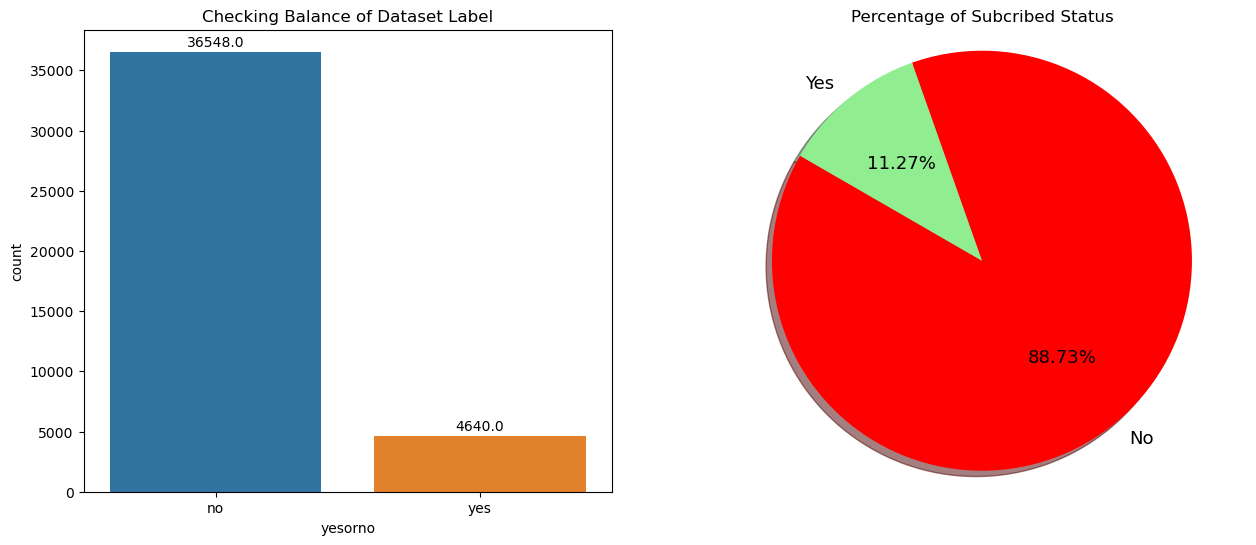

In [10]:
# mengecek keseimbangan jumlah label/output dataset
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(121)
plt.title("Checking Balance of Dataset Label")
ax = sns.countplot(x='yesorno', data=df)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,7), textcoords='offset points')
    
plt.subplot(122)
plt.title("Percentage of Subcribed Status")
subscribed_values_count = df['yesorno'].value_counts()
subscribed_size = subscribed_values_count.values.tolist()
subscribed_labels = 'No', 'Yes'
colors=['red', 'lightgreen']
pcs, texts, autotexts = plt.pie(subscribed_size, labels=subscribed_labels, colors=colors,
                             autopct='%2.2f%%', shadow=True, startangle=150)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(13)
    autotext.set_fontsize(13)

plt.axis('equal')
plt.show()


dapat dilihat bahwa No lebih banyak dibandingkan Yes

mengeksplorasi kolom kategorikal

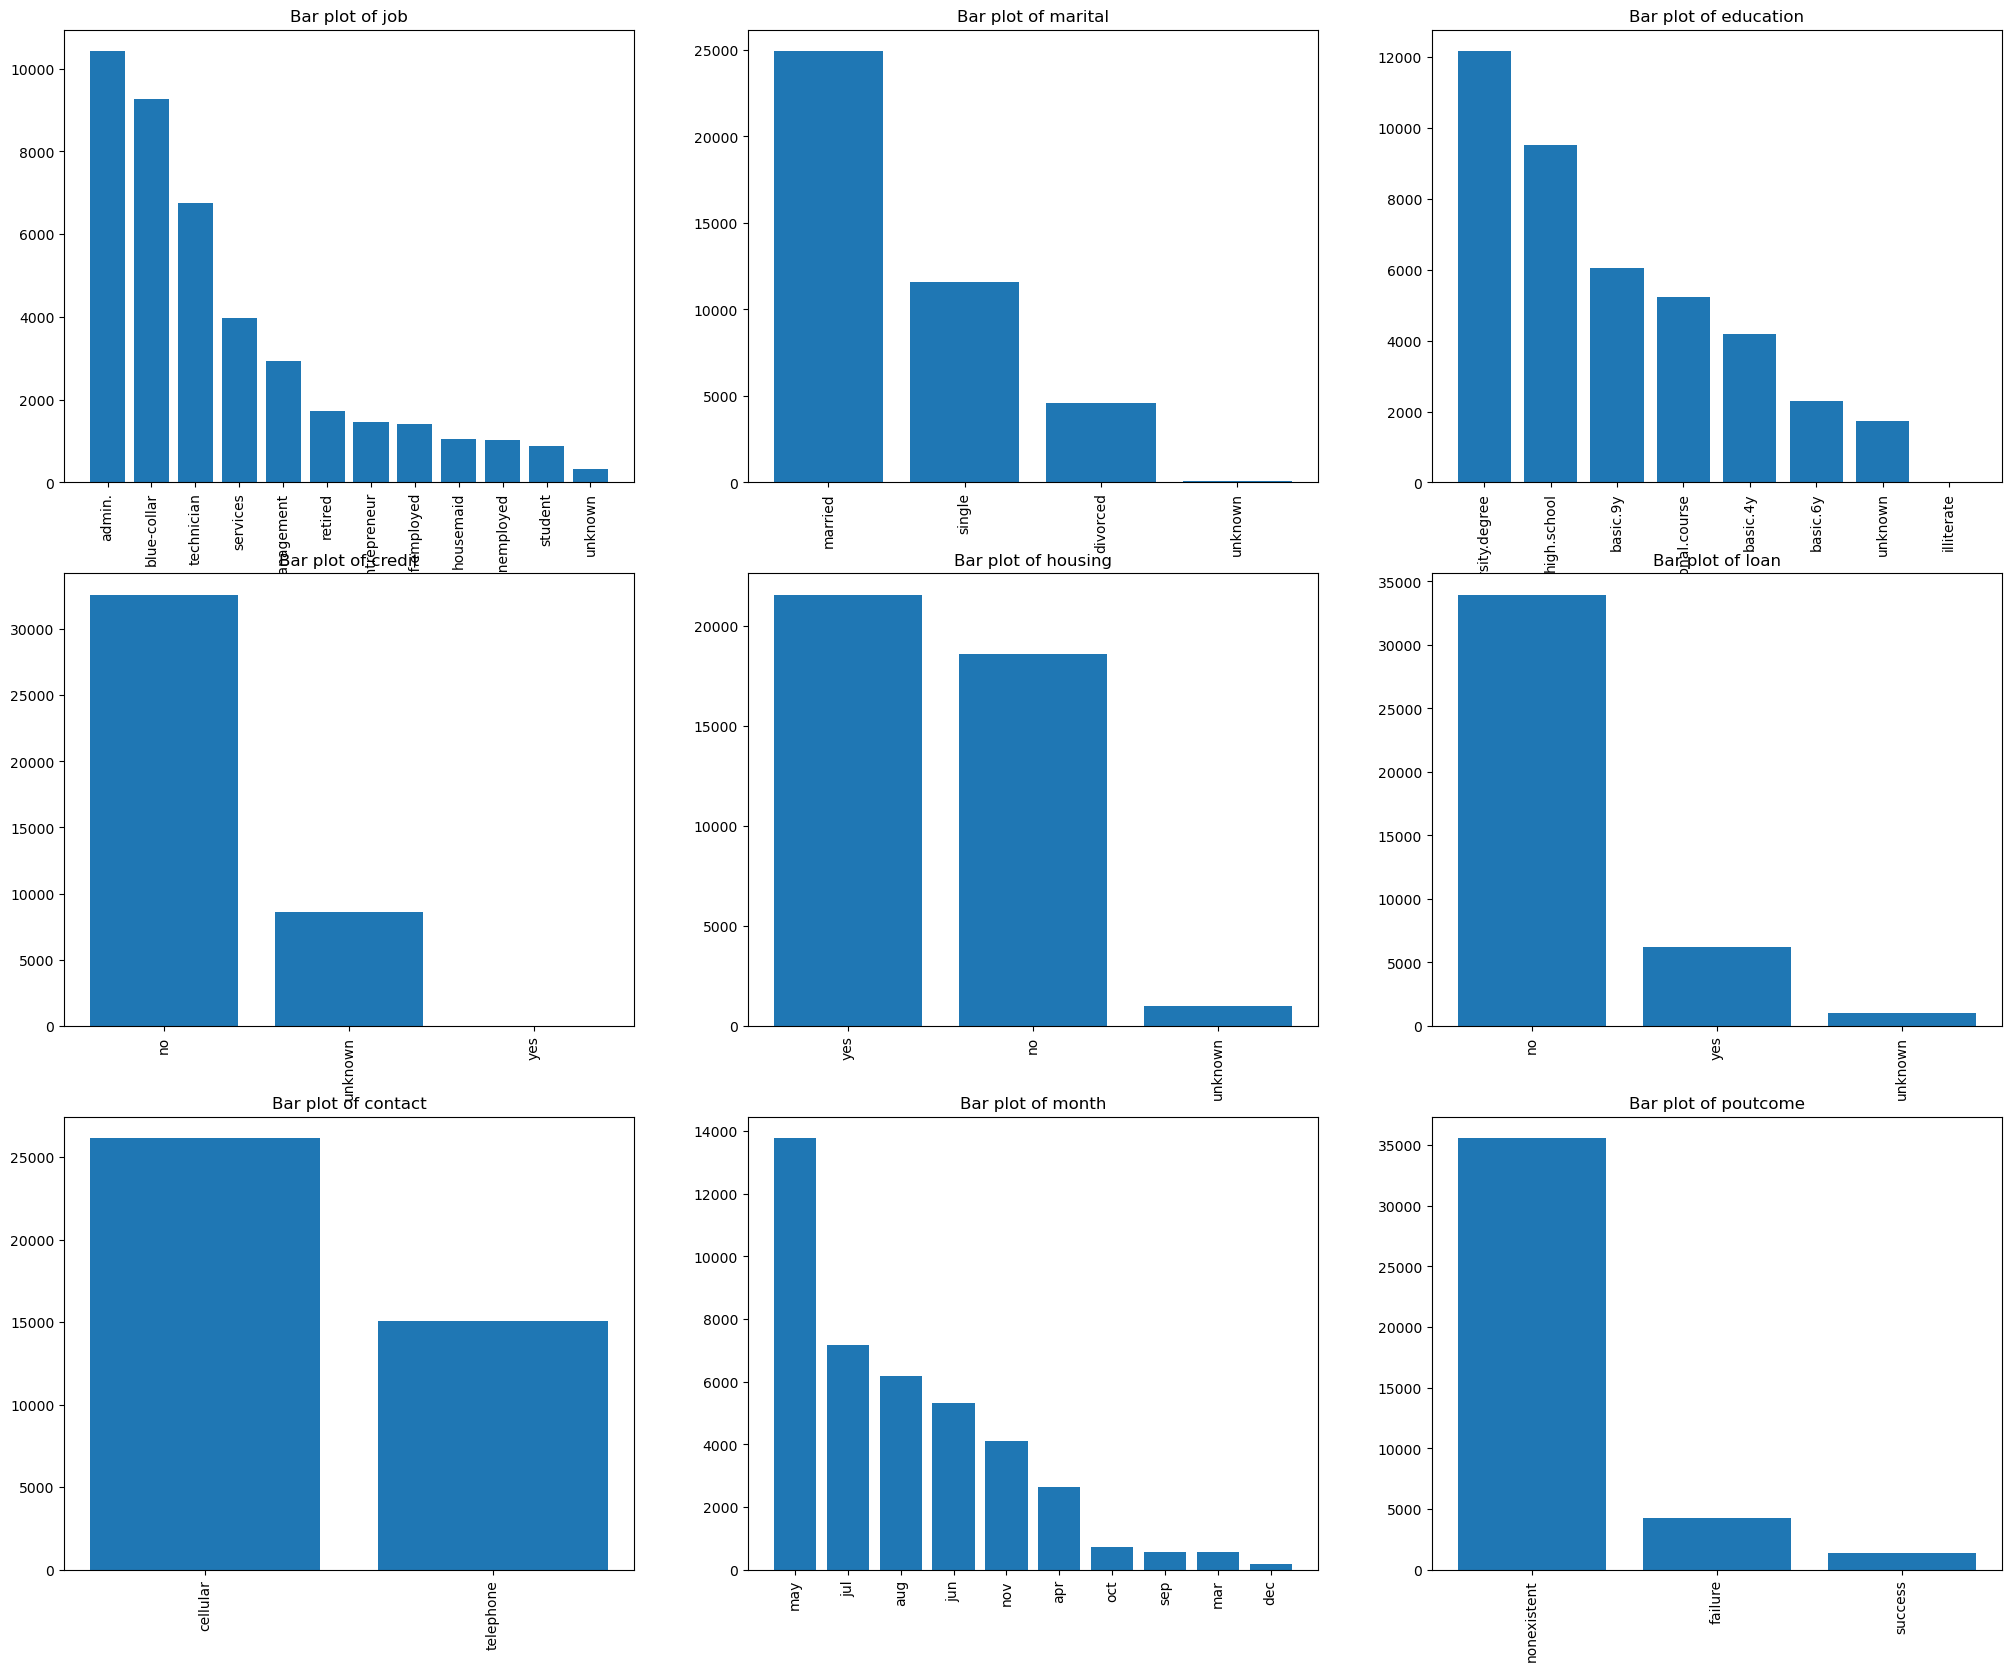

In [11]:
# Categorical columns exploration

categorical_cols = ['job','marital','education','credit','housing',
                   'loan','contact','month','poutcome']
fig, ax = plt.subplots(3,3, sharex=False, sharey=False, figsize=(25,20))
count = 0
for cat_col in categorical_cols:
    value_count = df[cat_col].value_counts()
    ax_x = count//3
    ax_y = count%3
    x_range = np.arange(0, len(value_count))
    ax[ax_x, ax_y].bar(x_range, value_count.values, tick_label=value_count.index)
    ax[ax_x, ax_y].set_title(f"Bar plot of {cat_col}")
    
    for i in ax[ax_x, ax_y].get_xticklabels():
        i.set_rotation(90)
    
    count+=1
plt.show()
    

data diatas menunjukkan exploration dari data categorical

exploration numerical data

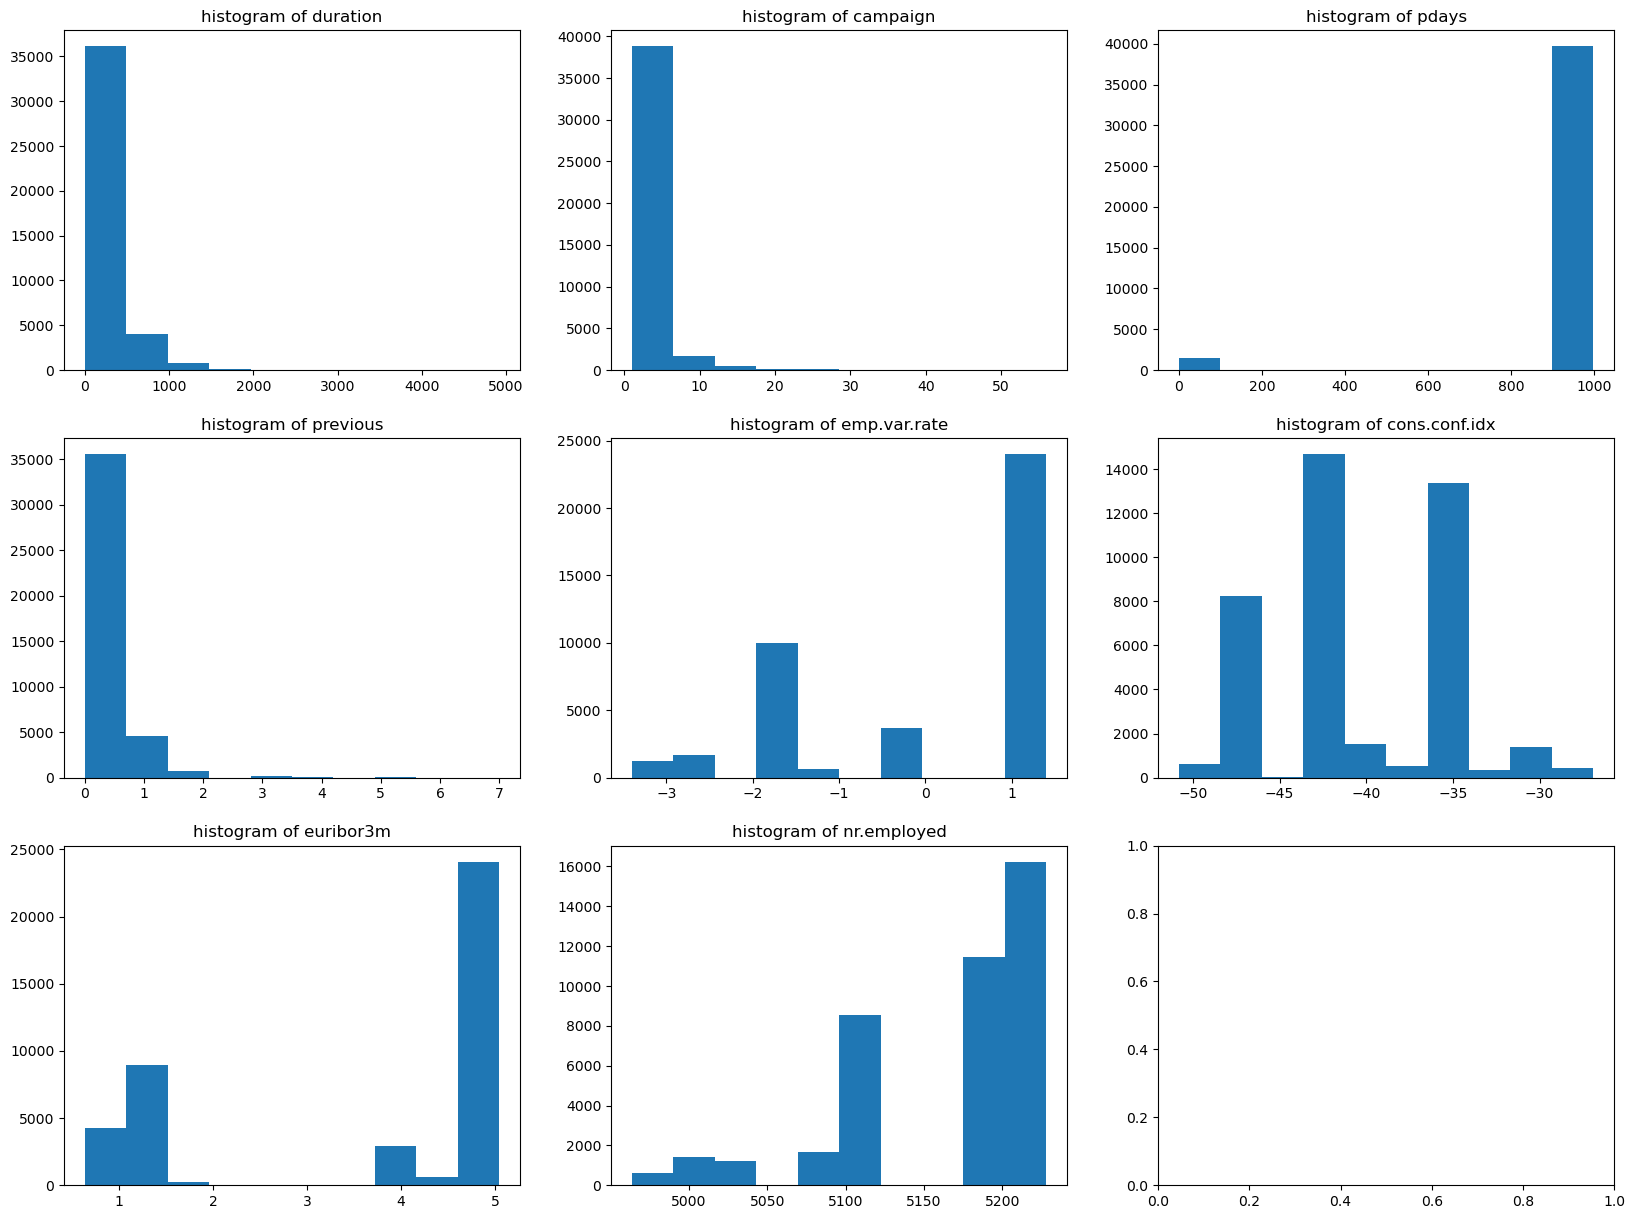

In [12]:
# Numerical columns exploration
num_cols = ['duration','campaign','pdays','previous','emp.var.rate',
            'cons.conf.idx','euribor3m','nr.employed']

fig, ax = plt.subplots(3,3, sharex=False, sharey=False, figsize=(20,15))
count = 0
for num_col in num_cols:
    ax_x = count//3
    ax_y = count%3
    
    ax[ax_x, ax_y].hist(df[num_col])
    ax[ax_x, ax_y].set_title(f"histogram of {num_col}")
    count+=1
plt.show()

data diatas menunjukkan visualisasi dari data numerical

merubah no dan yes menjadi 0 dan 1

In [13]:
df['yesorno'].replace({'yes':1, 'no':0}, inplace=True)

corr dari kolom subscribed

In [14]:
corr = df.corr()
print(corr['yesorno'].sort_values(axis=0, ascending=True))

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
campaign         -0.066357
age               0.030399
cons.conf.idx     0.054878
previous          0.230181
duration          0.405274
yesorno           1.000000
Name: yesorno, dtype: float64


C:\Users\MINAN\AppData\Local\Temp\ipykernel_2668\2443195046.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


menghapus kolom yang tidak diperlukan

In [15]:
# drop features yang memiliki korelasi lebih sedikit dan tidak relevan dengan proses klasifikasi
df.drop(columns=['nr.employed','pdays','euribor3m','emp.var.rate',
    'cons.price.idx','day_of_week','cons.conf.idx','contact','month'],axis=0, inplace=True)

In [16]:
df

,age,job,marital,education,credit,housing,loan,duration,campaign,previous,poutcome,yesorno
0,56,housemaid,married,basic.4y,no,no,no,261,1,0,nonexistent,0
1,57,services,married,high.school,unknown,no,no,149,1,0,nonexistent,0
2,37,services,married,high.school,no,yes,no,226,1,0,nonexistent,0
3,40,admin.,married,basic.6y,no,no,no,151,1,0,nonexistent,0
4,56,services,married,high.school,no,no,yes,307,1,0,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,334,1,0,nonexistent,1
41184,46,blue-collar,married,professional.course,no,no,no,383,1,0,nonexistent,0
41185,56,retired,married,university.degree,no,yes,no,189,2,0,nonexistent,0
41186,44,technician,married,professional.course,no,no,no,442,1,0,nonexistent,1


# ENCODER

mengimport modul yang diperlukan

In [17]:
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler

melakukan encoder dengan beberapa kolom

In [18]:
encoder = LabelEncoder()
col = ['marital','credit','housing','loan']

for i in col:
    df[i] = encoder.fit_transform(df[i])

melakukan encoding dengan beberapa kolom

In [19]:
# Encoding
cat_features = ['job','marital','education','credit','housing','loan','poutcome']
df = pd.get_dummies(df, columns=cat_features, drop_first=True)
df

,age,duration,campaign,previous,yesorno,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_university.degree,education_unknown,credit_1,credit_2,housing_1,housing_2,loan_1,loan_2,poutcome_nonexistent,poutcome_success
0,56,261,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,57,149,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,37,226,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,40,151,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,56,307,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
41184,46,383,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41185,56,189,2,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
41186,44,442,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


membuat variable dari kolom subscribed untuk membuat model dan test

In [20]:
#Assign variable features dan label
X = df.drop(columns='yesorno', axis=1).values
y = df['yesorno'].values

# MODEL

mengimport modul

In [21]:
from sklearn.model_selection import train_test_split

melakukan train_test_split dengan variabel yang sudah dibuat

In [22]:
#splitting data scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=103)

melakukan standart scaler

In [23]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

import modul confusion metrix

In [24]:
from sklearn import metrics

logistik regression

In [25]:
# Logistik Regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
ypred = model_lr.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, ypred))
print(metrics.confusion_matrix(y_test, ypred))
print(metrics.classification_report(y_test, ypred))

Accuracy:  0.9076636724123979
[[10731   238]
 [  903   485]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10969
           1       0.67      0.35      0.46      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.66      0.70     12357
weighted avg       0.89      0.91      0.89     12357



akurasinya masih belum terlalu bagus

SVM

In [26]:
# SUPPORT VECTOR MACHINES (SVM)
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
ypred2=svm_model.predict(X_test)
print("Acc: ", metrics.accuracy_score(y_test, ypred2))
print(metrics.confusion_matrix(y_test, ypred2))
print(metrics.classification_report(y_test, ypred2))

Acc:  0.902889050740471
[[10801   168]
 [ 1032   356]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10969
           1       0.68      0.26      0.37      1388

    accuracy                           0.90     12357
   macro avg       0.80      0.62      0.66     12357
weighted avg       0.89      0.90      0.88     12357



akurasinya masih belum terlalu bagus

mengimport modul smote untuk melalukan over sampling

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

resample

In [28]:
X_train_smote, y_train_smote= smote.fit_resample(X_train.astype('float'),y_train)

menunjukkan setelah dan sebelum oversampling

In [29]:
from collections import Counter
print("Before oversampling: ",Counter(y_train))
print("After oversampling: ",Counter(y_train_smote))

Before oversampling:  Counter({0: 25579, 1: 3252})
After oversampling:  Counter({0: 25579, 1: 25579})


Logistic Regression Model

In [30]:
# Logistik Regression
from sklearn.linear_model import LogisticRegression
model_lr2 = LogisticRegression()
model_lr2.fit(X_train_smote, y_train_smote)
ypred_smote = model_lr2.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, ypred_smote))
print(metrics.confusion_matrix(y_test, ypred_smote))
print(metrics.classification_report(y_test, ypred_smote))

Accuracy:  0.8387958242291819
[[9287 1682]
 [ 310 1078]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     10969
           1       0.39      0.78      0.52      1388

    accuracy                           0.84     12357
   macro avg       0.68      0.81      0.71     12357
weighted avg       0.90      0.84      0.86     12357



setelah dilakukan oversampling akurasinya sudah menjadi lebih baik

KNN model

In [31]:
# K-NEAREST NEIGHBOR ALGORITHM
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train_smote, y_train_smote)
pred_cv5= KNN.predict(X_test)
print("ACC: ", metrics.accuracy_score(y_test, pred_cv5))
matrix5 = metrics.confusion_matrix(y_test, pred_cv5)
print(matrix5)
print(metrics.classification_report(y_test, pred_cv5))

ACC:  0.8112810552723153
[[9145 1824]
 [ 508  880]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     10969
           1       0.33      0.63      0.43      1388

    accuracy                           0.81     12357
   macro avg       0.64      0.73      0.66     12357
weighted avg       0.88      0.81      0.84     12357



SVM model

In [32]:
# SUPPORT VECTOR MACHINES (SVM)
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train_smote, y_train_smote)
ypred2=svm_model.predict(X_test)
print("Acc: ", metrics.accuracy_score(y_test, ypred2))
print(metrics.confusion_matrix(y_test, ypred2))
print(metrics.classification_report(y_test, ypred2))

Acc:  0.8235817755118556
[[9101 1868]
 [ 312 1076]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     10969
           1       0.37      0.78      0.50      1388

    accuracy                           0.82     12357
   macro avg       0.67      0.80      0.69     12357
weighted avg       0.90      0.82      0.85     12357



mengimport modul naive bayes

In [33]:
from sklearn.naive_bayes import GaussianNB


Naive Bayes Model

In [34]:
nbmodel = GaussianNB()
nbmodel.fit(X_train_smote, y_train_smote)
nbmodel.score(X_train_smote, y_train_smote)

0.56984244888385

In [35]:
y_prednb = nbmodel.predict(X_test)

In [36]:
y_prednb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
print("Acc: ", metrics.accuracy_score(y_test, y_prednb))
print(metrics.confusion_matrix(y_test, y_prednb))
print(metrics.classification_report(y_test, y_prednb))

Acc:  0.8876750020231448
[[10969     0]
 [ 1388     0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10969
           1       0.00      0.00      0.00      1388

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357



C:\Users\MINAN\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MINAN\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MINAN\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

import modul decision tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

DecisionTree model

In [39]:
dtmodel = DecisionTreeClassifier(random_state=10)

dtmodel.fit(X_train_smote,y_train_smote)
dtmodel.score(X_train_smote,y_train_smote)

0.9999609054302357

In [40]:
preddt = dtmodel.predict(X_test)

In [41]:
print("Acc: ", metrics.accuracy_score(y_test, preddt))
print(metrics.confusion_matrix(y_test, preddt))
print(metrics.classification_report(y_test, preddt))

Acc:  0.4582827547139273
[[4349 6620]
 [  74 1314]]
              precision    recall  f1-score   support

           0       0.98      0.40      0.57     10969
           1       0.17      0.95      0.28      1388

    accuracy                           0.46     12357
   macro avg       0.57      0.67      0.42     12357
weighted avg       0.89      0.46      0.53     12357



import modul random forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

RandomForest Model

In [43]:
rfmodel = RandomForestClassifier(n_estimators=10, max_depth=3,random_state=100)
rfmodel.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=100)

In [44]:
print("Train Score: ", rfmodel.score(X_train_smote, y_train_smote))
print("Test Score: ", rfmodel.score(X_test, y_test))

Train Score:  0.8147699284569373
Test Score:  0.6219147042162337


In [45]:
predrf = rfmodel.predict(X_test)

In [46]:
print("Acc: ", metrics.accuracy_score(y_test, predrf))
print(metrics.confusion_matrix(y_test, predrf))
print(metrics.classification_report(y_test, predrf))

Acc:  0.6219147042162337
[[6419 4550]
 [ 122 1266]]
              precision    recall  f1-score   support

           0       0.98      0.59      0.73     10969
           1       0.22      0.91      0.35      1388

    accuracy                           0.62     12357
   macro avg       0.60      0.75      0.54     12357
weighted avg       0.90      0.62      0.69     12357



In [47]:
df


,age,duration,campaign,previous,yesorno,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_university.degree,education_unknown,credit_1,credit_2,housing_1,housing_2,loan_1,loan_2,poutcome_nonexistent,poutcome_success
0,56,261,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,57,149,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,37,226,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,40,151,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,56,307,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
41184,46,383,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41185,56,189,2,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
41186,44,442,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   duration                       41188 non-null  int64
 2   campaign                       41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   yesorno                        41188 non-null  int64
 5   job_blue-collar                41188 non-null  uint8
 6   job_entrepreneur               41188 non-null  uint8
 7   job_housemaid                  41188 non-null  uint8
 8   job_management                 41188 non-null  uint8
 9   job_retired                    41188 non-null  uint8
 10  job_self-employed              41188 non-null  uint8
 11  job_services                   41188 non-null  uint8
 12  job_student                    41188 non-null  uint8
 13  job_technician  

In [49]:
df.columns

Index(['age', 'duration', 'campaign', 'previous', 'yesorno', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_1', 'marital_2', 'marital_3',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'credit_1',
       'credit_2', 'housing_1', 'housing_2', 'loan_1', 'loan_2',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

Mengumpulkan model dan melihat yang terbaik

In [52]:
lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=5)
nb = GaussianNB()
rf = RandomForestClassifier(n_estimators=50, max_depth=5)
kn = KNeighborsClassifier(n_neighbors=5)
svm = svm.SVC()

In [53]:
lr.fit(X_train_smote,y_train_smote)
dt.fit(X_train_smote,y_train_smote)
nb.fit(X_train_smote,y_train_smote)
rf.fit(X_train_smote,y_train_smote)
kn.fit(X_train_smote,y_train_smote)
svm.fit(X_train_smote,y_train_smote)

SVC()

In [ ]:
print("Linear Model Score: ", lr.score(X_test, y_test))
print("DT Model Score: ", dt.score(X_test, y_test))
print("Naive Bayes Model Score: ", nb.score(X_test, y_test))
print("RF Model Score: ", rf.score(X_test, y_test))
print("kNN Model Score: ", kn.score(X_test, y_test))
print("svm model score:", svm.score(X_test, y_test))

Linear Model Score:  0.8387958242291819
DT Model Score:  0.6549324269644736
Naive Bayes Model Score:  0.8876750020231448
RF Model Score:  0.5808044023630331
kNN Model Score:  0.8112810552723153


dapat dilihat bahwa naive bayes merupakan model dengan score terbaik yaitu 0.8876750020231448, dan random forest mendapatkan score terendah yaitu 0.5774864449299992